This notebook is based on another notbook from: Aayush Agrawal  
Various amendments and complements have been made by: Andreas Traut  
Date: 13.08.2020  

## Introduction (by Andreas Traut)

In this Jupyter notebook I use the "fast.ai" open source library. "Fast.ai" is based on "PyTorch" and is intended to simplify work with deep learning, including by standardizing common deep learning concepts. In addition to the documentation (https://docs.fast.ai/) and a forum (https://forums.fast.ai/) there are also courses (https://course.fast.ai/ and also on Youtube https://www.youtube.com/playlist?list=PLfYUBJiXbdtSIJb-Qd3pw0cqCbkGeS0xn).

"PyTorch" (on which "fast.ai" is based) was developed by the "Facebook research team for artificial intelligence" and is freely available as open source. It is currently one of the most interesting alternatives to "Tensorflow", which was developed by the Google Brain team (also open source). There are numerous articles and discussions around these two "champions" PyTorch and Tensorflow. For example, here (https://deepsense.ai/keras-or-pytorch/) 43,000 machine learning articles were evaluated and it emerged that Tensorflow was mentioned in 14% of the articles, just under 5% Pytorch, then below 4% others. So Tensorflow is "market leader", but Pytorch's growth rates have risen sharply since 2018.

I also looked at the forums of "fast.ai" and had conversations there (see https://forums.fast.ai/t/fastai2-and-course-2020-important-notice/75684/16): I would describe "fast.ai" as a project that is carried out with a lot of passion by some developers, but which will probably never have the continuity and application security (e.g. in the event of release changes) as other projects (e.g. Tensorflow or PyTorch). I have noticed that a release change with "fast.ai" leads to incompatibilities of the notebooks, which means that all older notebooks have to be re-prepared and clean-eup every time, when there is a new fastai-release. The present one is based on fastai-1.0.61. As soon as the new release fastai-2 comes out (probably at the end of 2020) this notebook will probably no longer work. The problem is, that fastai has lots of complicated dependencies with other python libraries (see also here: https://docs.fast.ai/troubleshoot.html#dedicated-environment). 

It's a shame, but this approach from "fast.ai" seems to me to be more of a "playground" and not a serious project with which one does important calculations for the production of companies. I have found that extensive research in forums is useful and important in order to make decisions for or against a library (such as "fast.ai"). In this case I tend rather against the use of "fast.ai" for the application in the production of a company for the reasons mentioned above.

## Further documentation

See here:
  
Understanding "Local-Sensitivity":   
https://towardsdatascience.com/finding-similar-images-using-deep-learning-and-locality-sensitive-hashing-9528afee02f5      
https://towardsdatascience.com/fast-near-duplicate-image-search-using-locality-sensitive-hashing-d4c16058efcb
  
Understanding "Res-Net":   
https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624    
  
Undersanding "k-Nearest Neighbour":    
https://www.wikiwand.com/en/K-nearest_neighbors_algorithm  

## Boiler Plate

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Installing libraries

In [5]:
#conda install -c pytorch -c fastai fastai

#pip install fastai

#pip install lshash3

#pip install lshashpy3

#conda install jupyter notebook

#conda install -c conda-forge jupyter_contrib_nbextensions

## Importing libaries

python -c "import lshashpy3 as lshash; print(lshash.__version__);"

In [ ]:
import pandas as pd
import pickle
import numpy as np
from fastai.vision import *
from fastai.callbacks.hooks import *
import matplotlib.pyplot as plt
from lshashpy3 import LSHash
from PIL import Image
import tqdm #from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)
import warnings; warnings.simplefilter('ignore')

In [3]:
path = Path('../data/caltechown/')

In [3]:
!conda info


     active environment : base
    active env location : C:\Users\andre\Anaconda3
       user config file : C:\Users\andre\.condarc
 populated config files : C:\Users\andre\.condarc
          conda version : 4.8.4
    conda-build version : 3.18.8
         python version : 3.7.7.final.0
       virtual packages : __cuda=11.0
       base environment : C:\Users\andre\Anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\andre\Anaconda3\pkgs
                          C:\Users\andre\.conda\pkgs
                          C:\Users\andre\AppData\Local\conda\conda\pkgs
       envs director

## Loading Data and Model

Replace:   
ImageItemList => ImageList  
random_split_by_pct => split_by_rand_pct

 

In [4]:
tfms = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=0, 
    max_lighting=0, 
    max_zoom=1, 
    max_warp=0
)
#data = (ImageList.from_folder(path)
#        .split_by_rand_pct(0.2)
#        .label_from_folder()
#        .transform(tfms=tfms, size=224)
#        .databunch(bs=64))
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch(bs=64))

In [5]:
## Creating the model
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=accuracy)

In [6]:
print('Number of classes {0}'.format(data.c))
print(data.classes)

Number of classes 106
['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105']


In [8]:
print('Train dataset size: {0}'.format(len(data.train_ds.x)))
print('Test dataset size: {0}'.format(len(data.valid_ds.x)))

Train dataset size: 7414
Test dataset size: 1853


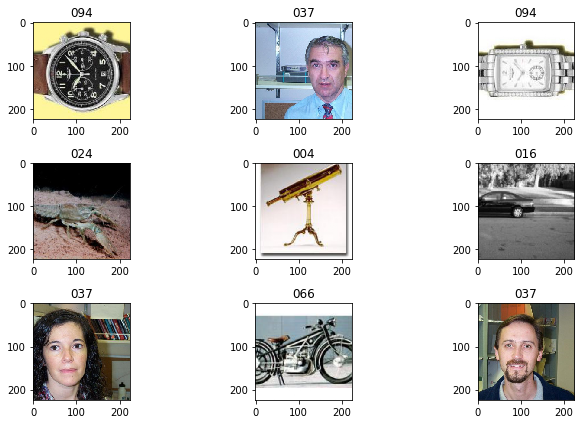

In [9]:
## Show sample data
data.show_batch(rows=3, figsize=(10,6), hide_axis=False) 

Replace:  
create_cnn => cnn_learner

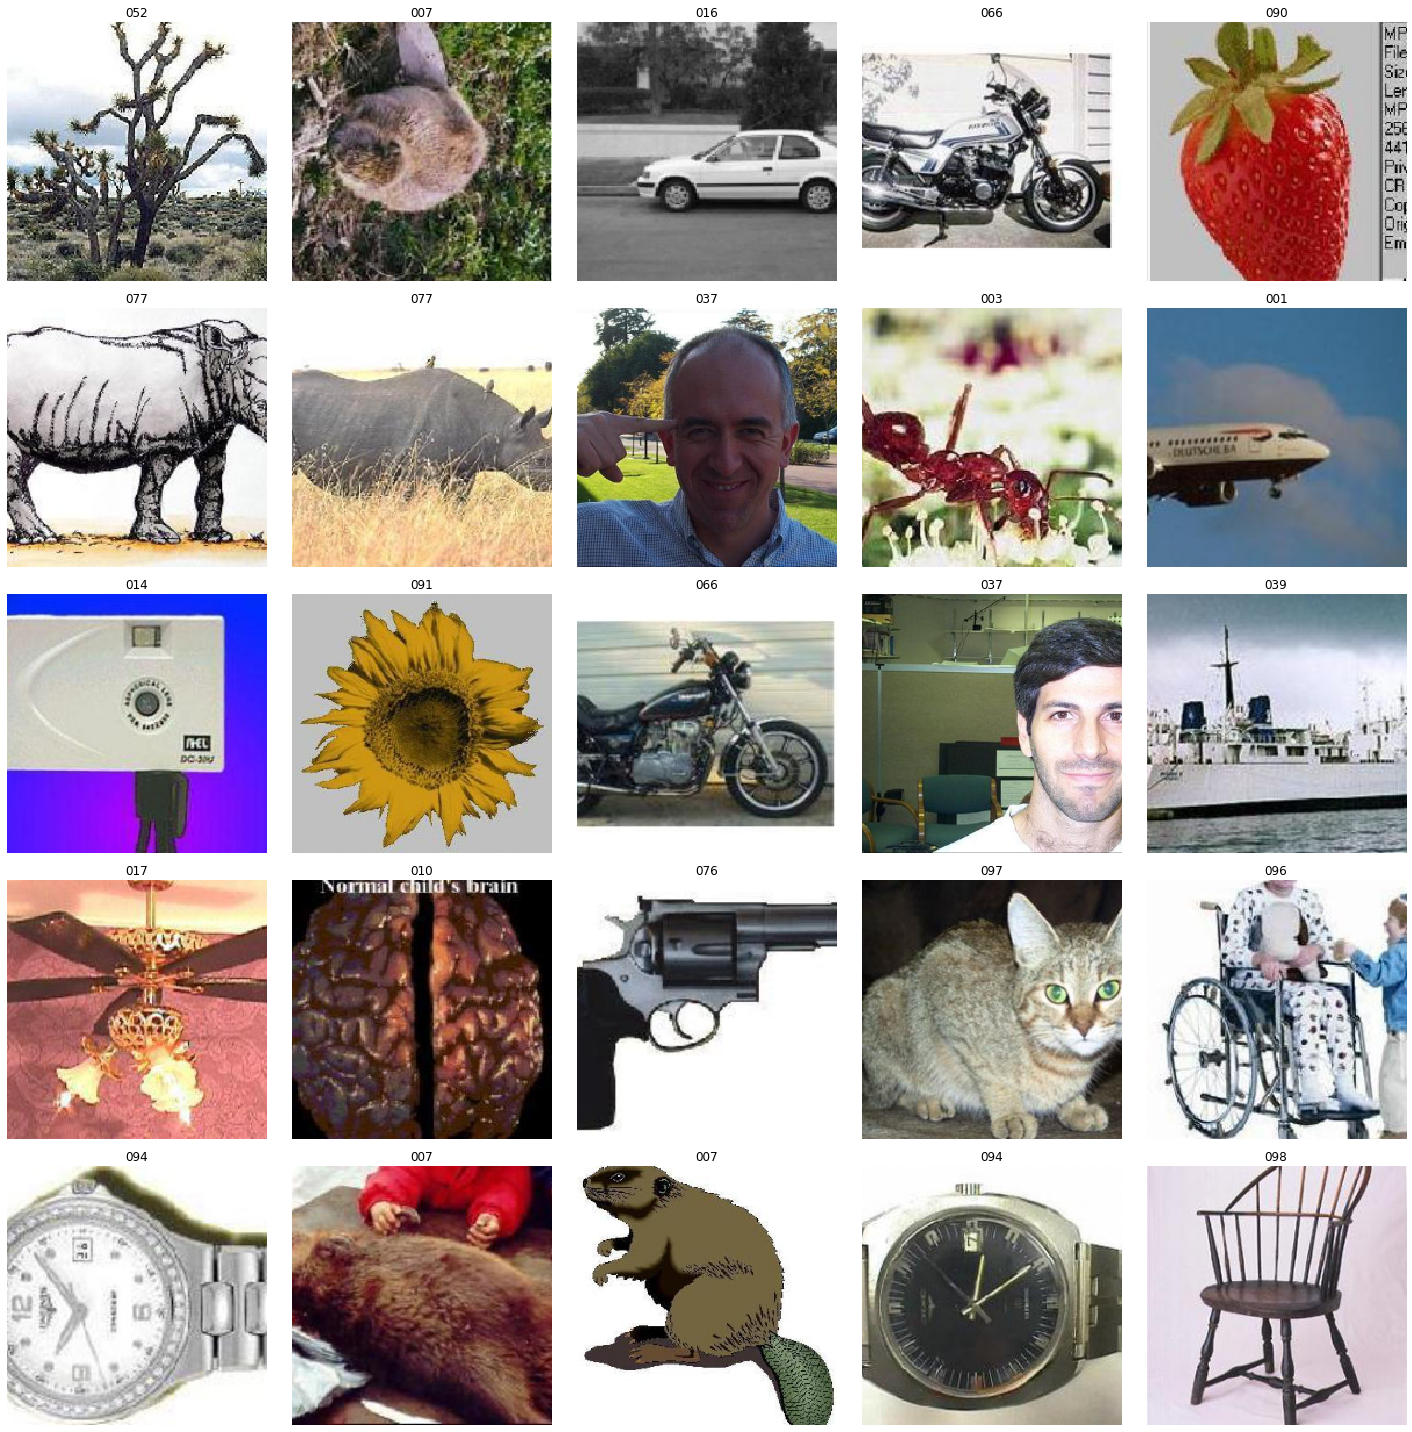

In [10]:
data.train_ds.items
data.show_batch(ds_type=DatasetType.Train)

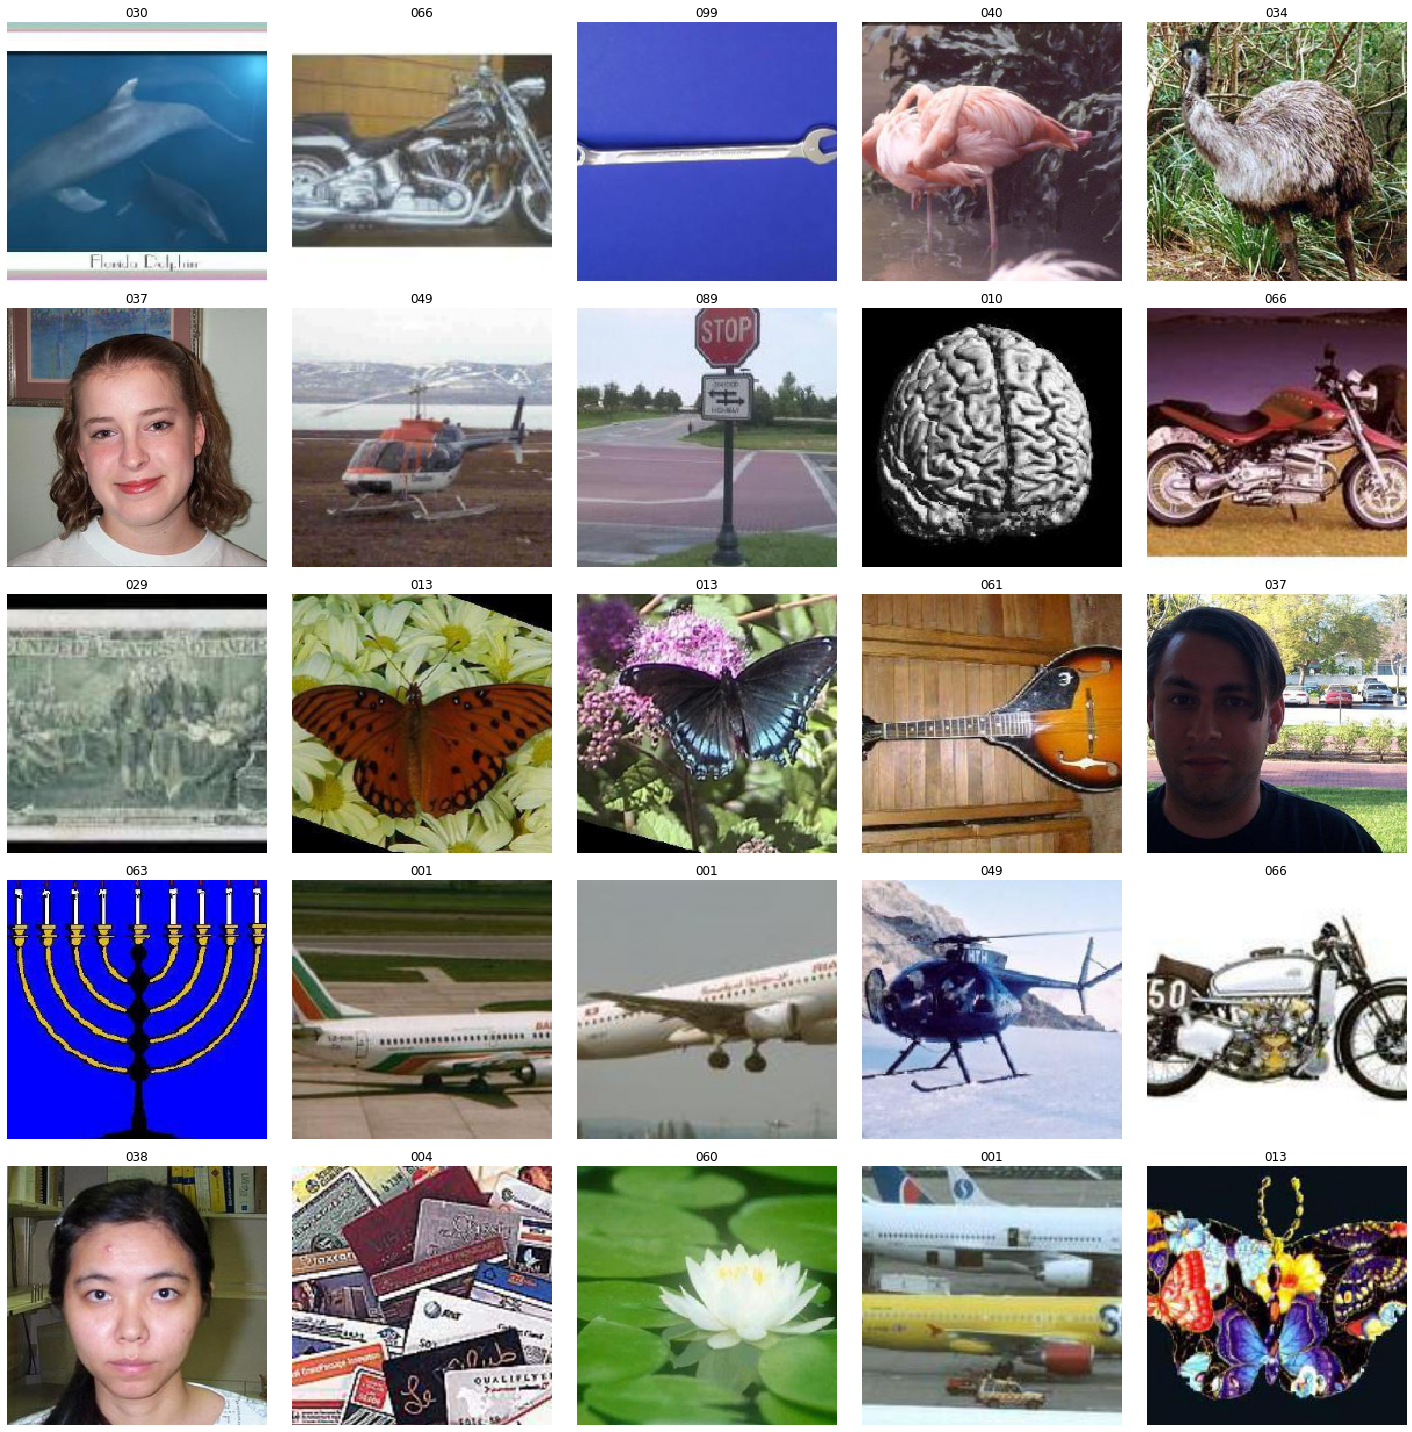

In [11]:
data.valid_ds.items
data.show_batch(ds_type=DatasetType.Valid)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


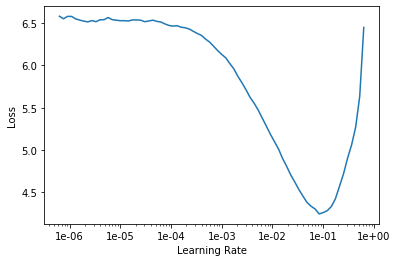

In [12]:
## Finding Ideal learning late
learn.lr_find()
learn.recorder.plot()

In [13]:
## Fitting 5 epochs
learn.fit_one_cycle(5,1e-2)

In [14]:
#https://docs.fast.ai/widgets.class_confusion.html
from fastai.widgets import ClassConfusion
interp = ClassificationInterpretation.from_learner(learn)
classlist = data.classes
ClassConfusion(interp, classlist, is_ordered=False, figsize=(8,8))

Please enter a value for `k`, or the top images you will see: 5


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [35:40<00:00, 21.19s/it]


<Figure size 432x288 with 0 Axes>

In [ ]:
interp.plot_confusion_matrix()

In [16]:
## Saving stage 1
learn.save('stg1-rn34')

In [ ]:
## Unfreeing layer and finding ideal learning rate
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
## Fitting 5 epochs
learn.fit_one_cycle(5, slice(1e-5, 1e-2/5))

In [ ]:
## Saving model weights
learn.save('stg2-rn34')

In [ ]:
learner = learn.load('stg2-rn34')

## Extracting Feature

Creating a hook right after convolutional part of resnet 50 and max pooling layer which generates a 4096 length vector for a particular image of 256*256.

In [ ]:
# this is a hook (learned about it here: https://forums.fast.ai/t/how-to-find-similar-images-based-on-final-embedding-layer/16903/13)
# hooks are used for saving intermediate computations
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()
        
sf = SaveFeatures(learn.model[1][5]) ## Output before the last FC layer

Creating Feature Vector

In [ ]:
## By running this feature vectors would be saved in sf variable initated above
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

Converting in a dictionary of {img_path:featurevector}

In [ ]:
img_path = [str(x) for x in (list(data.train_ds.items)+list(data.valid_ds.items))]

In [ ]:
feature_dict = dict(zip(img_path,sf.features))
feature_dict

In [ ]:
## Exporting as pickle
pickle.dump(feature_dict, open(path/"feature_dict.p", "wb"))

## Using Locality Sensitive hashing to find near similar images

In [ ]:
## Loading Feature dictionary
feature_dict = pickle.load(open(path/'feature_dict.p','rb'))

In [ ]:
## Locality Sensitive Hashing
# params
k = 10 # hash size
L = 5  # number of tables
d = 512 # Dimension of Feature vector
lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in tqdm.notebook.tqdm(feature_dict.items()):
    lsh.index(vec.flatten(), extra_data=img_path)

In [ ]:
lsh.query(1, distance_func='hamming')

In [ ]:
## Exporting as pickle
pickle.dump(lsh, open(path/'lsh.p', "wb"))

## Visualizing Output

In [ ]:
## Loading Feature dictionary
feature_dict = pickle.load(open(path/'feature_dict.p','rb'))
lsh = pickle.load(open(path/'lsh.p','rb'))

In [ ]:
def get_similar_item(idx, feature_dict, lsh_variable,output_name, n_items=5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='hamming')
    
    columns = 3
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
    plt.savefig('output/'+ output_name + '.png', bbox_inches="tight", pad_inches=0)
    return plt.show()

In [ ]:
def get_similar_item_vect(vect, feature_dict, lsh_variable, output_name, n_items=5):
    response = lsh_variable.query(vect, 
                     num_results=n_items+1, distance_func='hamming')
    
    columns = 8
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(4*rows, 6*rows))
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
    plt.savefig('output/' + output_name + '.png', bbox_inches="tight", pad_inches=0)
    return plt.show()

In [ ]:
testfolder = '103'
testfile = '9236'
imagenumber = list(feature_dict.keys()).index('..\\data\\caltechown\\' + testfolder + '\\' + testfile + '.jpg')
img = Image.open(list(feature_dict.keys())[imagenumber])
plt.imshow(img)   
plt.savefig('output/' + testfolder + '_' + testfile +  '.png', bbox_inches="tight", pad_inches=0)

In [ ]:
get_similar_item(imagenumber, feature_dict, lsh,testfolder + '_' + testfile + 'similar', 8 )

In [ ]:
testpicture = '4'
path = '..\\data\\testpictures\\' + testpicture + '.jpg'
img = Image.open(path)
plt.imshow(img)
plt.savefig('output/testpicture_' + testpicture + '.png', bbox_inches="tight", pad_inches=0)

In [ ]:
_ = learner.predict(open_image(path))
vect = sf.features[-1]
get_similar_item_vect(vect, feature_dict, lsh, 'testpicture_' + testpicture + 'similar', 7)

In [ ]:
testpicture = '1'
path = '..\\data\\testpictures\\' + testpicture + '.jpg'
img = Image.open(path)
plt.imshow(img)
plt.savefig('output/testpicture_' + testpicture + '.png', bbox_inches="tight", pad_inches=0)

In [ ]:
_ = learner.predict(open_image(path))
vect = sf.features[-1]
get_similar_item_vect(vect, feature_dict, lsh, 'testpicture_' + testpicture + 'similar', 23)

In [ ]:
import jovian

In [ ]:
#jovian.commit()